### Derivatives computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from truss import *

In [2]:
areas = np.zeros(10)+0.1
totalMass, stresses = truss(areas)

print("Total mass: ", totalMass)
print("Stresses: ", stresses)

Total mass:  41.96467529817258
Stresses:  [ 1953649.86968812   401246.32255496 -2046350.13031189  -598753.67744504
   354896.19224308   401246.32255496  1479762.54527792 -1348664.57946827
   846765.57116354  -567447.99120956]


### Finite difference method

In [3]:
def finite_difference(step):
    dA = step
    dm_dA = np.zeros(10)

    for i in range(len(areas)):
        areasTmp = np.copy(areas)
        areasTmp[i] = areas[i] + dA
        mp, sp = truss(areasTmp)
        dm_dA[i] = (mp - totalMass) / + step
    return dm_dA

def complex_step(step):
    dA = step*1j
    dm_dA = np.zeros(10)
    areas_ref = areas.astype(complex)

    for i in range(len(areas)):
        areasTmp = areas.astype(complex)
        areasTmp[i] = areas_ref[i] + dA
        mp, sp = truss(areasTmp)
        dm_dA[i] = mp.imag / step
    return dm_dA

Text(0, 0.5, '$\\frac{\\partial m}{\\partial A_i}$')

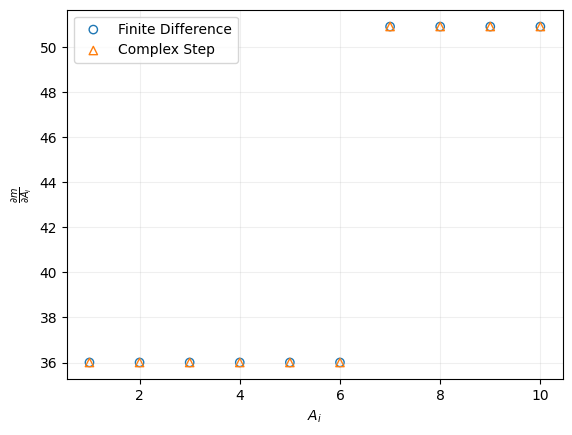

In [4]:
step = 1e-12
dm_dA_fd = finite_difference(step)
dm_dA_cs = complex_step(step)
plt.scatter(np.linspace(1, 10, 10), dm_dA_fd, marker='o', facecolors='none', edgecolors='C0', label='Finite Difference')
plt.scatter(np.linspace(1, 10, 10), dm_dA_cs, marker='^', facecolors='none', edgecolors='C1', label='Complex Step')
plt.grid(alpha=0.2)
plt.legend()
plt.xlabel(r'$A_i$')
plt.ylabel(r'$\frac{\partial m}{\partial A_i}$')